In [37]:
#libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_diabetes
import pandas as pd

In [38]:
#dataset
#dataset = load_diabetes()
#x = dataset.data
#y = dataset.target

dataset = pd.read_csv('/content/drive/MyDrive/FMB/diabetes.csv')

In [39]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [41]:
x = dataset[feature_cols]
y = dataset['Outcome']

In [42]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)

In [43]:
#declare the algorithum
clf = DecisionTreeClassifier()

In [44]:
#train
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = clf.predict(x_test)

In [46]:
#accuracy

print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

accuracy score:  0.70995670995671


In [47]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [48]:
dot_data = StringIO()

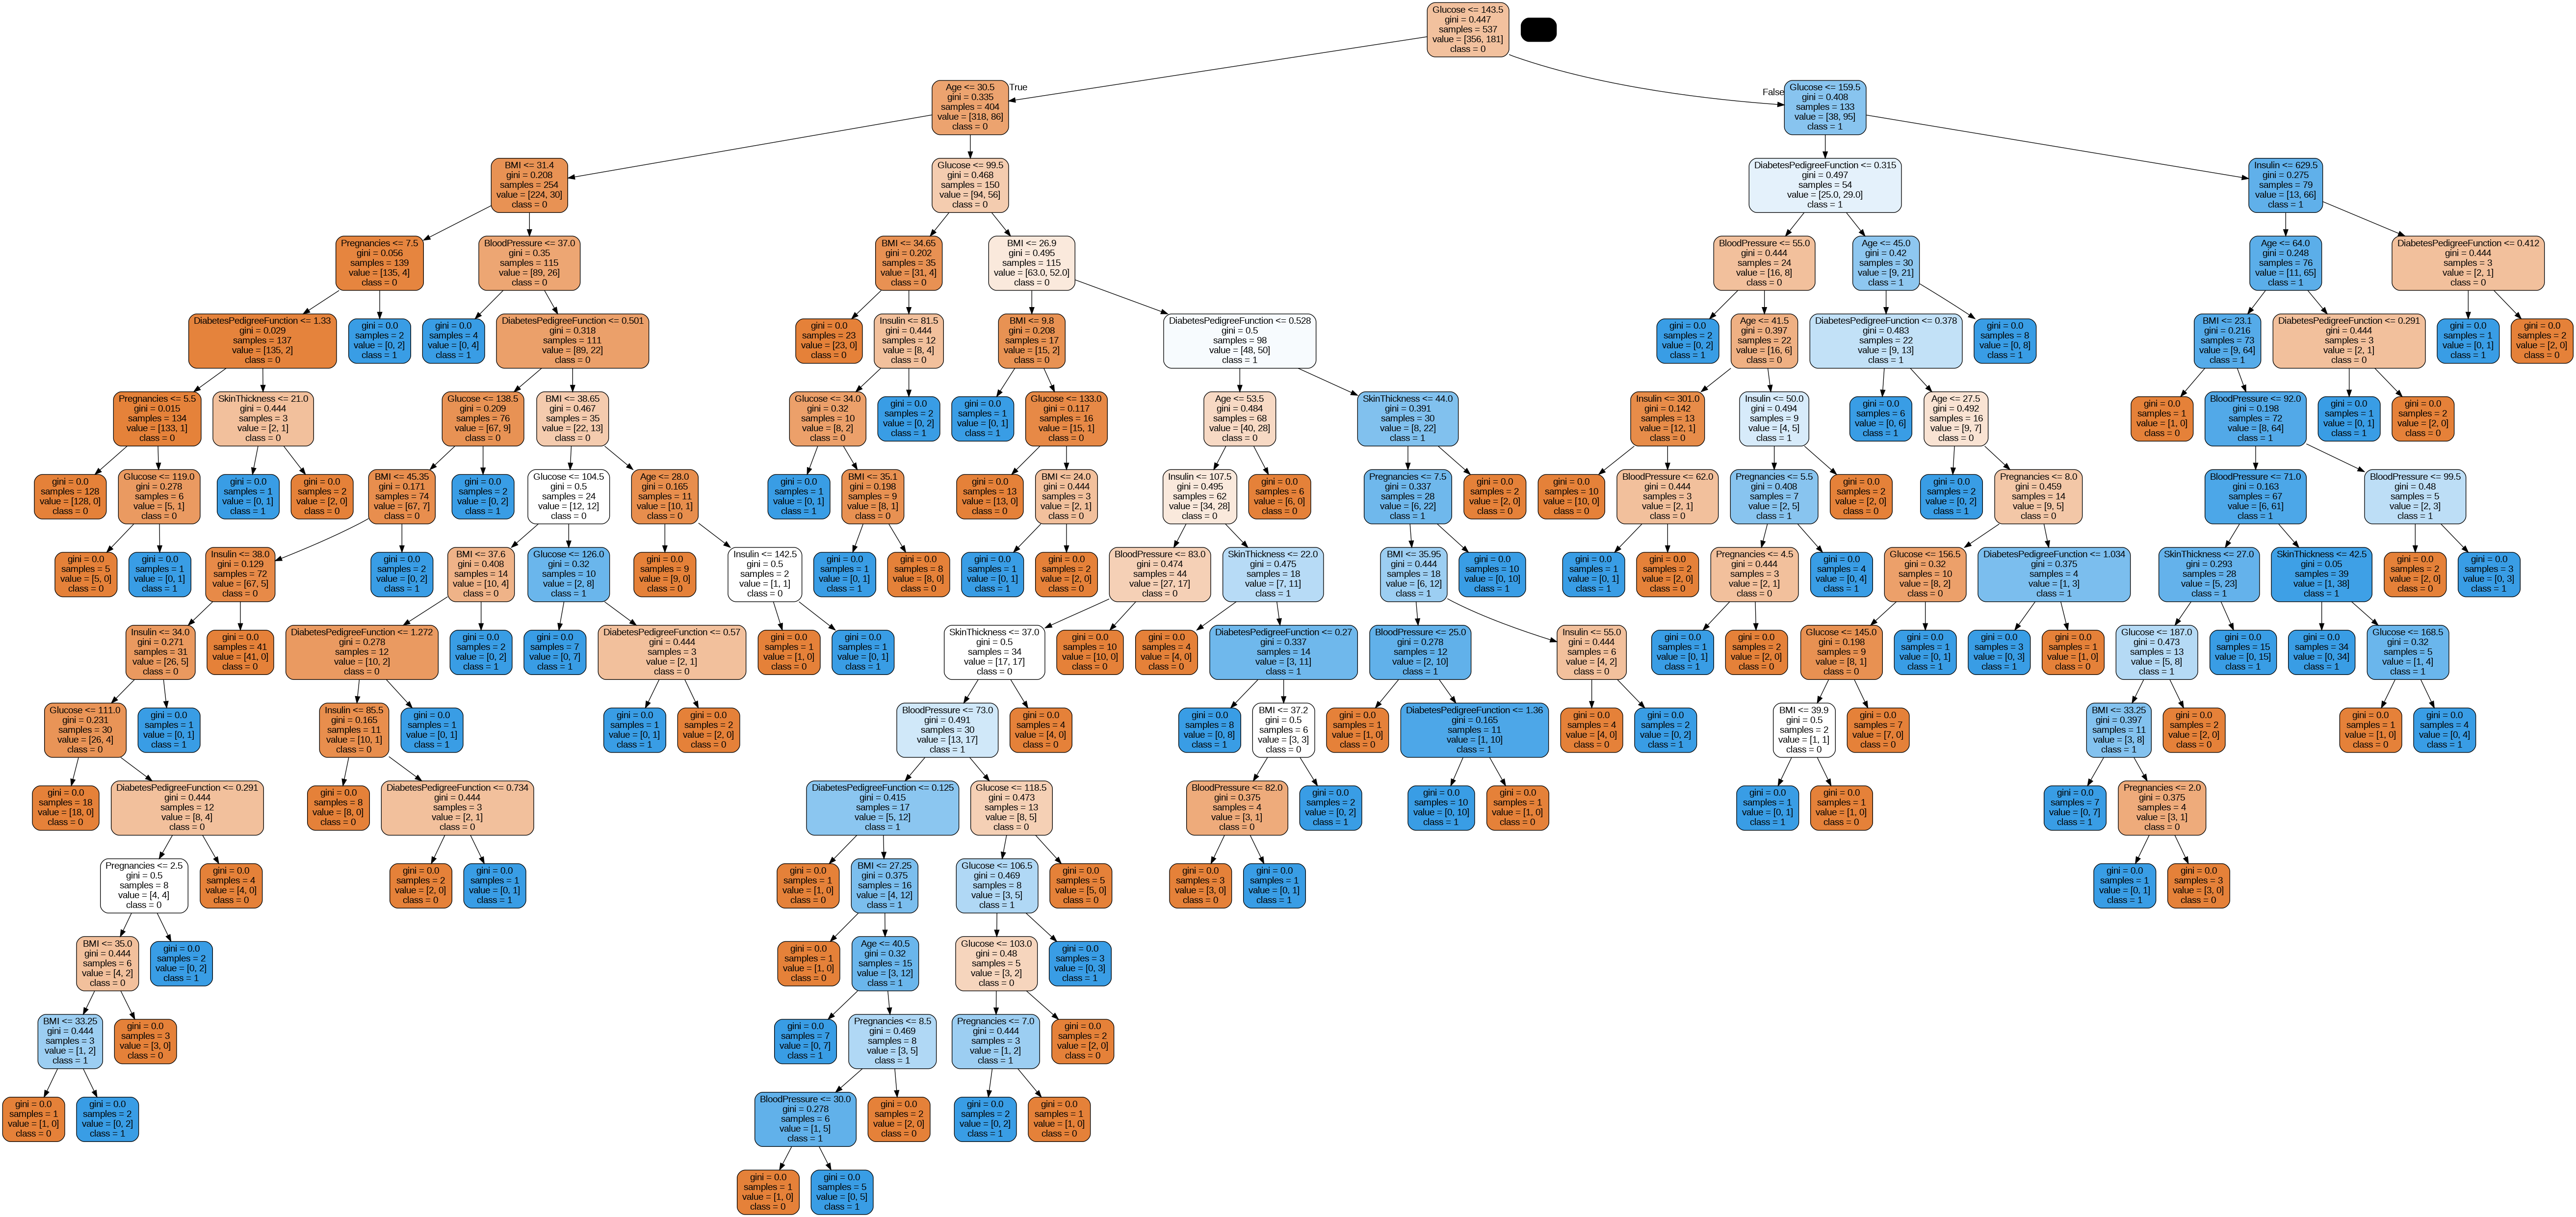

In [49]:
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())